    Humza Humayun  DATA-4380
   # Tabular Kaggle Project


## Harmful Brain Activity Classification 

https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification/

   The basis of this dataset follows the analysis of electrical activity in the brain via the usage of an electroencephalogram (EEG) on critically ill patients . The EEG uses small electrodes applied to a patient’s scalp to measure the electrical signals fired between neurons. With these measurements, it is possible to detect abnormalities and seizure activity in the brain of a patient via anomalies in the EEG readings. This data problem provided by Harvard Medical School (HMS) seeks to integrate machine learning algorithms in the analysis of such data, to seek out patterns correlative to harmful brain activity with great efficiency. 

Briefly describe the data.

The information within this dataset 

What type of Machine Learning? Supervised Classification (binary or multiclass) or Regression?

# Data Loading and Initial Look

- Make a table, where each row is a feature or collection of features:
  - Is the feature categorical or numerical
  - What values?
    - e.g. for categorical: "0,1,2"
    - e.g. for numerical specify the range
  - How many missing values
  - Do you see any outliers?
  - Define outlier.
- For classification, is there class imbalance?
- What is the target:
  - Classification: how is the target encoded (e.g. 0 and 1)?
  - Regression: what is the range?
  
print(train_data_in.head())
print(train_data_in.info())
print(train_data_in.describe())


In [2]:
#functions:

import os
import pandas as pd
import numpy as np

def count_files(file_path):
    count_x=0
    for file in os.listdir(file_path):
        count_x+=1
    return count_x

def read_in_parq_data(file_path, num_files=20):
    data_in = []
    count_x = 0
    
    for file in os.listdir(file_path):
        if file.endswith(".parquet"):
            parquet_in = pd.read_parquet(os.path.join(file_path, file))
            data_in.append(parquet_in)
            count_x += 1
            if count_x == num_files:
                break

    return pd.concat(data_in, ignore_index=True)

def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

In [3]:
#Load the data.
train_data_in = pd.read_csv("hms-harmful-brain-activity-classification/train.csv")
train_data_in.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [4]:
read_in_parq_data("hms-harmful-brain-activity-classification/train_eegs",200)

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-105.849998,-89.230003,-79.459999,-49.230000,-99.730003,-87.769997,-53.330002,-50.740002,-32.250000,-42.099998,-43.270000,-88.730003,-74.410004,-92.459999,-58.930000,-75.739998,-59.470001,8.210000,66.489998,1404.930054
1,-85.470001,-75.070000,-60.259998,-38.919998,-73.080002,-87.510002,-39.680000,-35.630001,-76.839996,-62.740002,-43.040001,-68.629997,-61.689999,-69.320000,-35.790001,-58.900002,-41.660000,196.190002,230.669998,3402.669922
2,8.840000,34.849998,56.430000,67.970001,48.099998,25.350000,80.250000,48.060001,6.720000,37.880001,61.000000,16.580000,55.060001,45.020000,70.529999,47.820000,72.029999,-67.180000,-171.309998,-3565.800049
3,-56.320000,-37.279999,-28.100000,-2.820000,-43.430000,-35.049999,3.910000,-12.660000,8.650000,3.830000,4.180000,-51.900002,-21.889999,-41.330002,-11.580000,-27.040001,-11.730000,-91.000000,-81.190002,-1280.930054
4,-110.139999,-104.519997,-96.879997,-70.250000,-111.660004,-114.430000,-71.830002,-61.919998,-76.150002,-79.779999,-67.480003,-99.029999,-93.610001,-104.410004,-70.070000,-89.250000,-77.260002,155.729996,264.850006,4325.370117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390395,-24.299999,-8.530000,933.580017,202.449997,-10.740000,159.710007,179.020004,-46.759998,-59.560001,-47.299999,266.399994,-15.830000,-103.669998,-63.700001,-59.770000,-52.060001,-70.099998,-67.529999,-73.910004,-14.370000
3390396,62.560001,70.370003,362.059998,277.470001,69.790001,324.070007,451.600006,17.500000,16.850000,30.469999,230.440002,67.529999,-25.540001,1.910000,20.959999,30.230000,12.410000,-8.540000,6.240000,17.830000
3390397,58.599998,67.519997,-1143.130005,-587.210022,68.389999,-402.880005,-499.399994,8.900000,14.440000,22.160000,-384.500000,64.459999,-32.290001,-6.490000,11.510000,23.520000,3.460000,-14.580000,-5.420000,-5.040000
3390398,-34.770000,-24.940001,351.769989,-139.410004,-22.530001,-130.660004,-203.220001,-61.720001,-78.750000,-69.500000,12.960000,-29.920000,-123.199997,-81.900002,-76.900002,-65.370003,-84.589996,-83.809998,-90.000000,7.780000


In [5]:
read_in_parq_data("hms-harmful-brain-activity-classification/train_spectrograms",200)

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,28.680000,53.990002,67.629997,59.880001,50.880001,74.309998,78.480003,63.080002,59.869999,...,0.13,0.14,0.08,0.11,0.04,0.03,0.05,0.05,0.04,0.05
1,3,29.639999,38.959999,44.009998,66.800003,48.509998,42.180000,47.340000,48.599998,40.880001,...,0.15,0.13,0.08,0.08,0.07,0.06,0.07,0.06,0.06,0.06
2,5,8.890000,9.020000,16.360001,23.559999,27.340000,30.040001,27.559999,23.290001,15.120000,...,0.12,0.11,0.08,0.08,0.09,0.10,0.12,0.14,0.13,0.14
3,7,1.770000,1.930000,1.810000,1.600000,1.430000,1.280000,1.190000,1.110000,1.010000,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.04
4,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75388,623,104.190002,134.720001,157.440002,142.300003,125.790001,87.769997,59.840000,34.820000,22.889999,...,0.63,0.41,0.35,0.38,0.41,0.52,0.71,0.55,0.43,0.29
75389,625,4.960000,4.860000,6.620000,6.690000,5.770000,7.240000,6.550000,3.670000,3.560000,...,0.99,0.88,0.65,0.25,0.30,0.56,0.66,0.66,0.67,0.36
75390,627,2.490000,2.840000,4.740000,5.690000,5.310000,4.940000,4.090000,2.630000,2.520000,...,0.66,0.67,0.53,0.39,0.38,0.36,0.32,0.48,0.49,0.62
75391,629,3.650000,4.210000,4.350000,5.240000,4.550000,4.030000,4.650000,4.550000,4.300000,...,0.56,0.48,0.75,0.61,0.67,0.73,0.45,0.74,0.72,0.59


In [6]:
#Count the number of rows (data points) and features.

shape=train_data_in.shape
print("Dataset specifications for 'train.csv:'\nNumber of Rows: "+str(shape[0])+"\nNumber of features: "+str(shape[1]))
x_1=count_files("hms-harmful-brain-activity-classification/train_eegs")
x_2=count_files("hms-harmful-brain-activity-classification/train_spectrograms")
print("\nNumber of files in train_eegs: "+str(x_1)+"\nNumber of files in train_spectrograms: "+str(x_2))

Dataset specifications for 'train.csv:'
Number of Rows: 106800
Number of features: 15

Number of files in train_eegs: 17300
Number of files in train_spectrograms: 11138


In [7]:
#lets take a look at an eeg file and corresponding Spectrogram data...
#EEG: 1628180742 and Spectrogram: 353733
dataX = pd.read_parquet("hms-harmful-brain-activity-classification/train_eegs/1628180742.parquet")
dataY = pd.read_parquet("hms-harmful-brain-activity-classification/train_spectrograms/353733.parquet")

In [8]:
train_data_in.iloc[0]

eeg_id                              1628180742
eeg_sub_id                                   0
eeg_label_offset_seconds                   0.0
spectrogram_id                          353733
spectrogram_sub_id                           0
spectrogram_label_offset_seconds           0.0
label_id                             127492639
patient_id                               42516
expert_consensus                       Seizure
seizure_vote                                 3
lpd_vote                                     0
gpd_vote                                     0
lrda_vote                                    0
grda_vote                                    0
other_vote                                   0
Name: 0, dtype: object

In [9]:
dataX

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-80.519997,-70.540001,-80.110001,-108.750000,-120.330002,-88.620003,-101.750000,-104.489998,-99.129997,-90.389999,-97.040001,-77.989998,-88.830002,-112.120003,-108.110001,-95.949997,-98.360001,-121.730003,-106.449997,7.920000
1,-80.449997,-70.330002,-81.760002,-107.669998,-120.769997,-90.820000,-104.260002,-99.730003,-99.070000,-92.290001,-96.019997,-84.500000,-84.989998,-115.610001,-103.860001,-97.470001,-89.290001,-115.500000,-102.059998,29.219999
2,-80.209999,-75.870003,-82.050003,-106.010002,-117.500000,-87.489998,-99.589996,-96.820000,-119.680000,-99.360001,-91.110001,-99.440002,-104.589996,-127.529999,-113.349998,-95.870003,-96.019997,-123.879997,-105.790001,45.740002
3,-84.709999,-75.339996,-87.480003,-108.970001,-121.410004,-94.750000,-105.370003,-100.279999,-113.839996,-102.059998,-95.040001,-99.230003,-101.220001,-125.769997,-111.889999,-97.459999,-97.180000,-128.940002,-109.889999,83.870003
4,-90.570000,-80.790001,-93.000000,-113.870003,-129.960007,-102.860001,-118.599998,-101.099998,-107.660004,-102.339996,-98.510002,-95.300003,-88.930000,-115.639999,-99.800003,-97.500000,-88.730003,-114.849998,-100.250000,97.769997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,-144.660004,-147.809998,-129.820007,-129.460007,-157.509995,-124.000000,-124.570000,-94.820000,-153.070007,-121.110001,-86.459999,-132.520004,-138.339996,-128.970001,-71.300003,-114.480003,-86.709999,-114.959999,-81.500000,-20.070000
17996,-140.880005,-153.000000,-129.529999,-129.020004,-154.059998,-131.220001,-128.380005,-95.000000,-140.820007,-114.639999,-84.379997,-115.339996,-119.230003,-114.709999,-70.989998,-92.129997,-79.639999,-116.139999,-81.879997,10.600000
17997,-133.729996,-141.770004,-121.900002,-122.370003,-158.750000,-123.550003,-127.730003,-93.089996,-125.230003,-106.489998,-83.419998,-112.720001,-103.209999,-107.629997,-61.869999,-97.910004,-77.150002,-106.500000,-75.339996,-2.060000
17998,-141.449997,-151.139999,-127.190002,-128.699997,-163.460007,-124.309998,-129.479996,-94.419998,-140.869995,-113.339996,-83.519997,-129.300003,-118.650002,-117.589996,-71.879997,-99.279999,-83.900002,-116.160004,-81.410004,2.820000


In [10]:
dataY

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,4.26,10.98,9.05,13.65,11.49,8.930000,18.840000,19.26,19.240000,...,0.31,0.17,0.28,0.19,0.24,0.27,0.29,0.16,0.22,0.19
1,3,2.65,3.97,12.18,13.26,14.21,13.230000,9.650000,8.11,11.280000,...,0.15,0.13,0.14,0.24,0.24,0.36,0.35,0.31,0.36,0.40
2,5,4.18,4.53,8.77,14.26,13.36,16.559999,19.219999,17.51,22.650000,...,0.29,0.21,0.16,0.25,0.28,0.28,0.34,0.48,0.44,0.48
3,7,2.41,3.21,4.92,8.07,5.97,12.420000,10.820000,14.96,21.809999,...,0.33,0.51,0.49,0.64,0.58,0.42,0.32,0.31,0.32,0.33
4,9,2.29,2.44,2.77,4.62,5.39,7.080000,9.840000,12.27,14.410000,...,0.44,0.38,0.48,0.63,0.45,0.45,0.49,0.33,0.31,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,631,6.36,6.59,6.60,7.30,4.48,8.400000,13.420000,13.85,16.010000,...,0.14,0.05,0.06,0.04,0.04,0.04,0.05,0.05,0.08,0.11
316,633,4.90,8.80,8.22,5.83,10.21,10.580000,10.250000,13.68,19.549999,...,0.16,0.08,0.06,0.06,0.07,0.04,0.06,0.09,0.07,0.08
317,635,6.07,7.85,11.26,9.20,8.18,9.130000,10.450000,15.09,23.020000,...,0.15,0.13,0.13,0.13,0.10,0.08,0.07,0.09,0.17,0.12
318,637,3.41,3.75,4.80,6.45,6.70,7.960000,8.160000,6.97,9.700000,...,0.13,0.11,0.13,0.07,0.11,0.12,0.09,0.16,0.19,0.19


In [11]:
train_data_in[train_data_in['eeg_id'] == 1628180742]
#we see here that each patient has their own id for themselves and eeg and spectrogram

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
5,1628180742,5,26.0,353733,5,26.0,2413091605,42516,Seizure,3,0,0,0,0,0
6,1628180742,6,30.0,353733,6,30.0,364593930,42516,Seizure,3,0,0,0,0,0
7,1628180742,7,36.0,353733,7,36.0,3811483573,42516,Seizure,3,0,0,0,0,0
8,1628180742,8,40.0,353733,8,40.0,3388718494,42516,Seizure,3,0,0,0,0,0


In [12]:
train_data_in['patient_id'].nunique()

1950

In [13]:
train_data_in['eeg_id'].nunique()

17089

In [14]:
train_data_in['spectrogram_id'].nunique()

11138

In [15]:
#Any missing values?
print("No missing values detected.")

No missing values detected.


- Make a table, where each row is a feature or collection of features:
  - Is the feature categorical or numerical
  - What values?
    - e.g. for categorical: "0,1,2"
    - e.g. for numerical specify the range
  - How many missing values
  - Do you see any outliers?
  - Define outlier.

Feature: eeg_id
Type: int64
Values: [1628180742 2277392603  722738444 ... 1850739625 1306668185  351917269]
Missing Values: 0


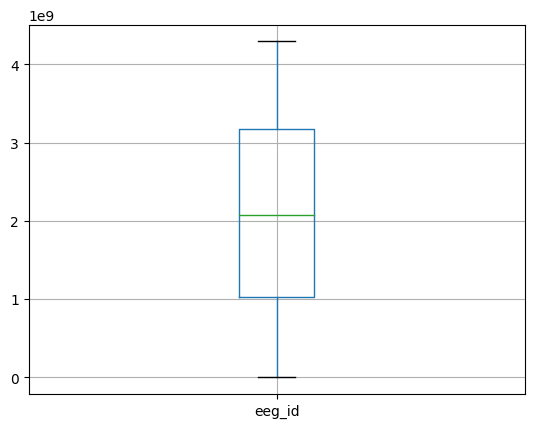

Feature: eeg_sub_id
Type: int64
Values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 23

/tmp/ipykernel_269/1191513074.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


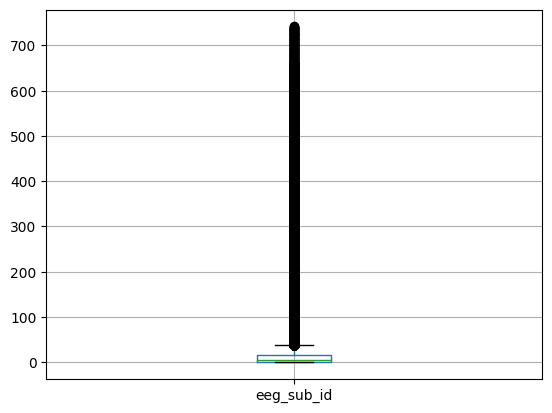

/tmp/ipykernel_269/1191513074.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


Feature: eeg_label_offset_seconds
Type: float64
Values: [   0.    6.    8. ... 1478. 1574. 1604.]
Missing Values: 0


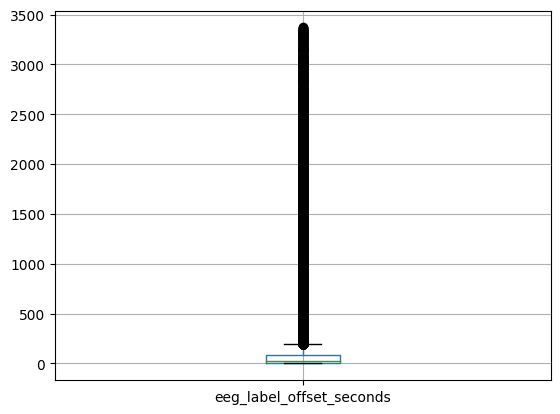

/tmp/ipykernel_269/1191513074.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


Feature: spectrogram_id
Type: int64
Values: [    353733     924234     999431 ... 2146798838 2147312808 2147388374]
Missing Values: 0


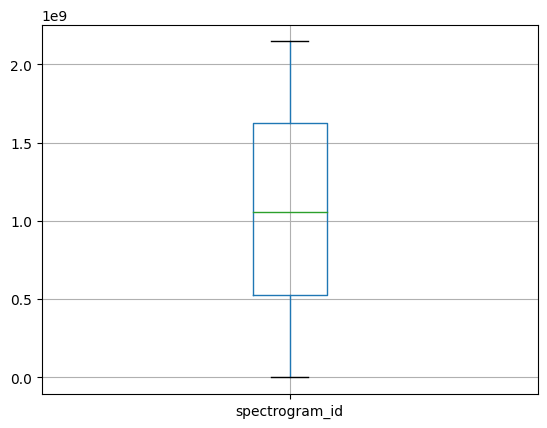

/tmp/ipykernel_269/1191513074.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


Feature: spectrogram_sub_id
Type: int64
Values: [   0    1    2 ... 1019 1020 1021]
Missing Values: 0


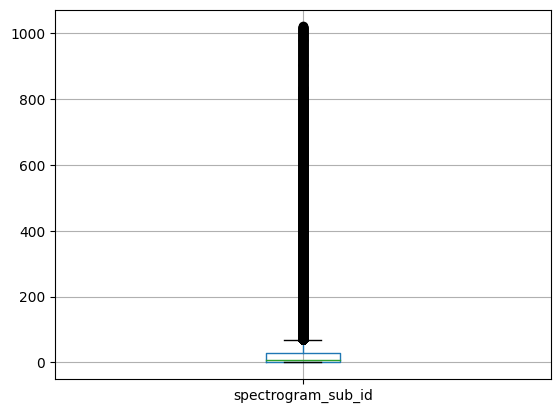

/tmp/ipykernel_269/1191513074.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


Feature: spectrogram_label_offset_seconds
Type: float64
Values: [   0.    6.    8. ... 1135. 1201. 1207.]
Missing Values: 0


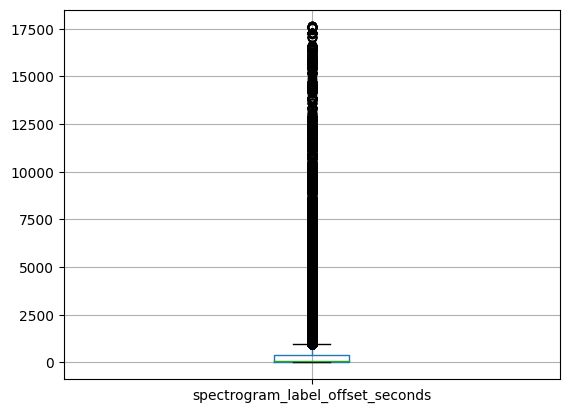

/tmp/ipykernel_269/1191513074.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


Feature: label_id
Type: int64
Values: [ 127492639 3887563113 1142670488 ...  461435451 3786213131 3642716176]
Missing Values: 0


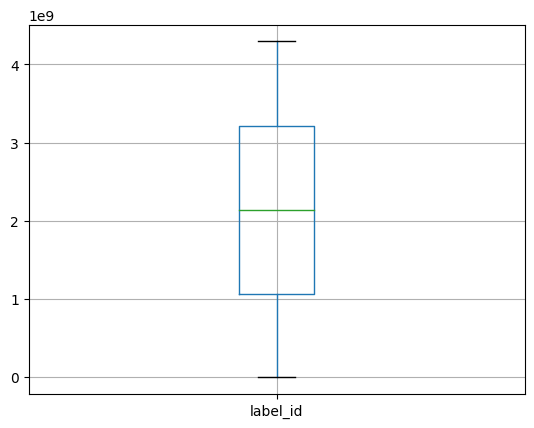

/tmp/ipykernel_269/1191513074.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


Feature: patient_id
Type: int64
Values: [42516 30539 56885 ...   200  5149  7118]
Missing Values: 0


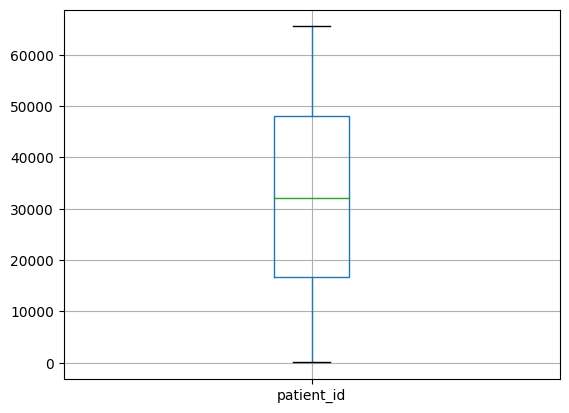

/tmp/ipykernel_269/1191513074.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


Feature: expert_consensus
Type: object
Values: ['Seizure' 'GPD' 'LRDA' 'Other' 'GRDA' 'LPD']
Missing Values: 0
Feature: seizure_vote
Type: int64
Values: [ 3  0  1  4  5  6 13  2 12 14  7 10 15  9  8 11 16 19]
Missing Values: 0


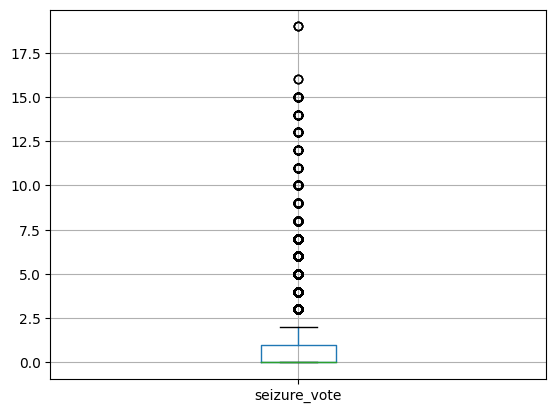

/tmp/ipykernel_269/1191513074.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


Feature: lpd_vote
Type: int64
Values: [ 0  1  2  4  7  3  9 13 11  5  6  8 12 15 10 18 14 16 17]
Missing Values: 0


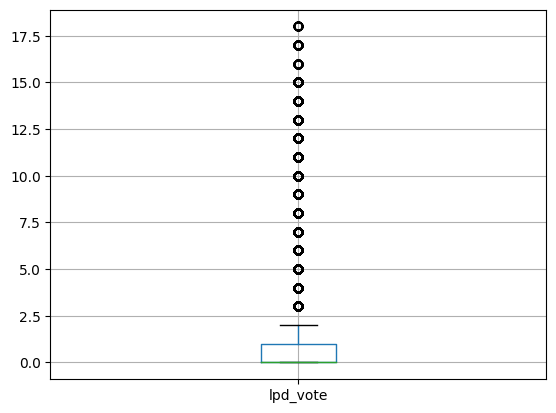

/tmp/ipykernel_269/1191513074.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


Feature: gpd_vote
Type: int64
Values: [ 0  5  2  1  3  7 12 13 11  6  4  8  9 14 10 15 16]
Missing Values: 0


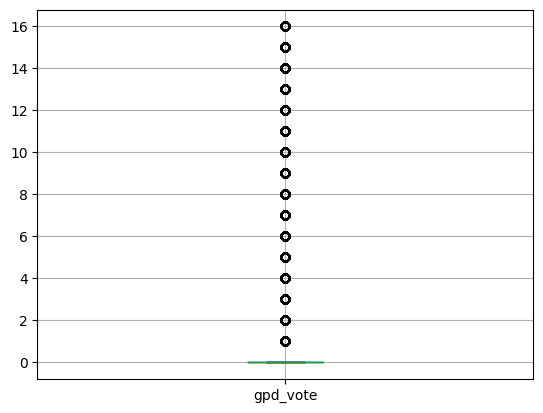

/tmp/ipykernel_269/1191513074.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


Feature: lrda_vote
Type: int64
Values: [ 0 14  3  2  1  9  5  8 11  4  6  7 12 10 13 15]
Missing Values: 0


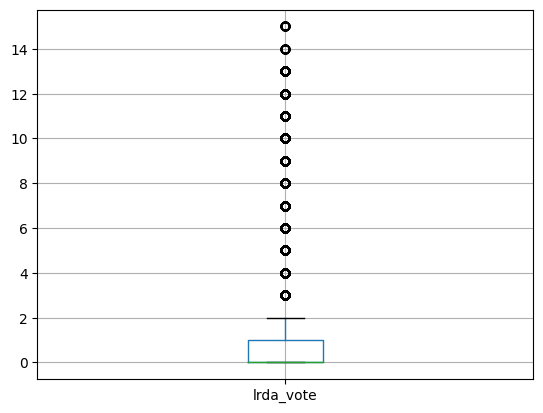

/tmp/ipykernel_269/1191513074.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


Feature: grda_vote
Type: int64
Values: [ 0  1  9  3  8  4  7  2  5  6 13 10 11 12 15 14]
Missing Values: 0


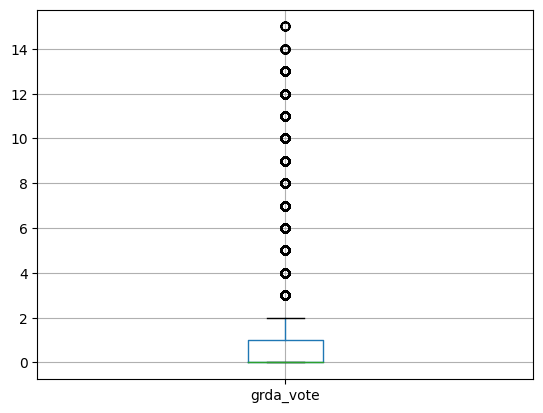

/tmp/ipykernel_269/1191513074.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


Feature: other_vote
Type: int64
Values: [ 0  5  1  9  2  3  4 17 10 12  8  7 11  6 16 15 18 14 13 20 19 25 24 21
 22 23]
Missing Values: 0


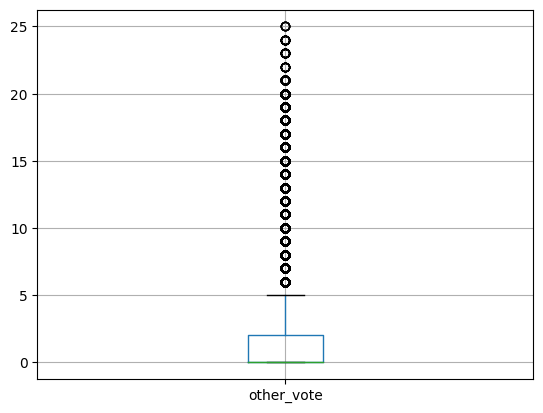

/tmp/ipykernel_269/1191513074.py:33: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_bound) | (data > upper_bound)


In [16]:
import matplotlib.pyplot as plt

features_seen = ['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id', 'spectrogram_sub_id','spectrogram_label_offset_seconds', 'label_id', 'patient_id', 'expert_consensus', 'seizure_vote','lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']

for feature in features_seen:
    print("Feature:", feature)
    print("Type:", train_data_in[feature].dtype)
    print("Values:", train_data_in[feature].unique())
    print("Missing Values:", train_data_in[feature].isna().sum())
    if train_data_in[feature].dtype == 'float64' or train_data_in[feature].dtype == 'int64':
        train_data_in.boxplot(column=feature)
        plt.show()
        detect_outliers(train_data_in)

- For classification, is there class imbalance?
- What is the target:
  - Classification: how is the target encoded (e.g. 0 and 1)?
  - Regression: what is the range?

In [37]:
# cast categroical labels in the expert_consensus column to labels / encode it
train_data_in['expert_consensus'].unique()

array(['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data_in['expert_consensus_encoded'] = label_encoder.fit_transform(train_data_in['expert_consensus'])
train_data_in['expert_consensus_encoded'].unique()

array([5, 0, 3, 4, 1, 2])

In [36]:
train_data_in.iloc[::]

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,expert_consensus_encoded
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0,5
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0,5
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0,5
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0,5
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0,5
5,1628180742,5,26.0,353733,5,26.0,2413091605,42516,Seizure,3,0,0,0,0,0,5


In [39]:
#there are multiple targets: seizure_vote	lpd_vote	gpd_vote	lrda_vote	grda_vote	other_vote

for col in train_data_in:
    target_range_min = train_data_in[col].min()
    target_range_max = train_data_in[col].max()
    print("Range for "+col+": ("+str(target_range_min)+","+str(target_range_max)+")")

Range for eeg_id: (568657,4294958358)
Range for eeg_sub_id: (0,742)
Range for eeg_label_offset_seconds: (0.0,3372.0)
Range for spectrogram_id: (353733,2147388374)
Range for spectrogram_sub_id: (0,1021)
Range for spectrogram_label_offset_seconds: (0.0,17632.0)
Range for label_id: (338,4294933502)
Range for patient_id: (56,65494)
Range for expert_consensus: (GPD,Seizure)
Range for seizure_vote: (0,19)
Range for lpd_vote: (0,18)
Range for gpd_vote: (0,16)
Range for lrda_vote: (0,15)
Range for grda_vote: (0,15)
Range for other_vote: (0,25)
Range for expert_consensus_encoded: (0,5)


In [20]:
#make a second version of this dataframe with the replaced encoded feature:
train_data_2=train_data_in.copy()
train_data_2['expert_consensus'],train_data_2['expert_consensus_encoded']=train_data_2['expert_consensus_encoded'],train_data_2['expert_consensus']
train_data_2=train_data_2.drop('expert_consensus_encoded',axis=1)
#train_data_2.head()
train_data_2.describe()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,2.606648,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,1.748826,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,4.294958e+09,742.000000,3372.000000,2.147388e+09,1021.000000,17632.000000,4.294934e+09,65494.000000,5.000000,19.000000,18.000000,16.000000,15.000000,15.000000,25.000000


In [40]:
for col in train_data_2:
    target_range_min = train_data_2[col].min()
    target_range_max = train_data_2[col].max()
    print("Range for "+col+": ("+str(target_range_min)+","+str(target_range_max)+")")
    #now we've got everything how we want it!

Range for eeg_id: (568657,4294958358)
Range for eeg_sub_id: (0,742)
Range for eeg_label_offset_seconds: (0.0,3372.0)
Range for spectrogram_id: (353733,2147388374)
Range for spectrogram_sub_id: (0,1021)
Range for spectrogram_label_offset_seconds: (0.0,17632.0)
Range for label_id: (338,4294933502)
Range for patient_id: (56,65494)
Range for expert_consensus: (0,5)
Range for seizure_vote: (0,19)
Range for lpd_vote: (0,18)
Range for gpd_vote: (0,16)
Range for lrda_vote: (0,15)
Range for grda_vote: (0,15)
Range for other_vote: (0,25)


# Data Visualization
For classification: compare histogram every feature between the classes. Lots of examples of this in class.

For regression:

Define 2 or more class based on value of the regression target.
For example: if regression target is between 0 and 1:
0.0-0.25: Class 1
0.25-0.5: Class 2
0.5-0.75: Class 3
0.75-1.0: Class 4
Compare histograms of the features between the classes.
Note that for categorical features, often times the information in the histogram could be better presented in a table.

Make comments on what features look most promising for ML task.

Feature: eeg_id
Type: int64
Values: [1628180742 2277392603  722738444 ... 1850739625 1306668185  351917269]
Missing Values: 0


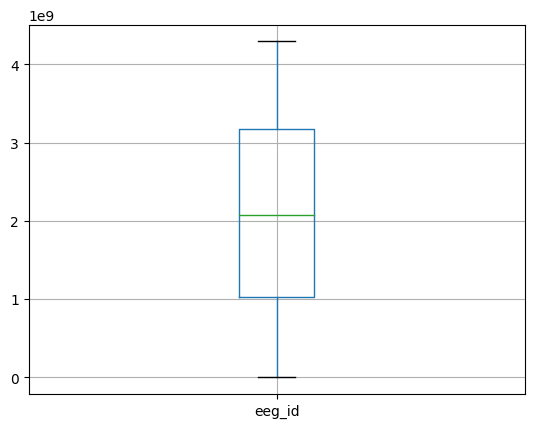

Feature: eeg_sub_id
Type: int64
Values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 23

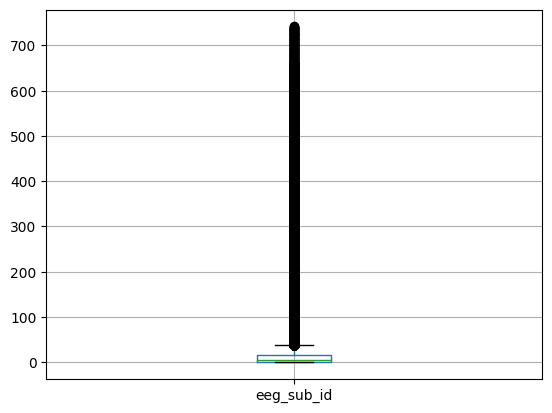

Feature: eeg_label_offset_seconds
Type: float64
Values: [   0.    6.    8. ... 1478. 1574. 1604.]
Missing Values: 0


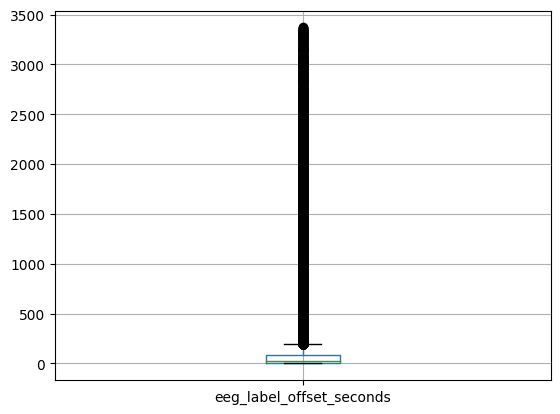

Feature: spectrogram_id
Type: int64
Values: [    353733     924234     999431 ... 2146798838 2147312808 2147388374]
Missing Values: 0


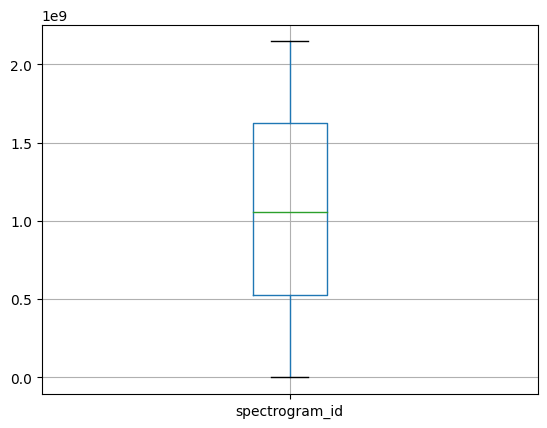

Feature: spectrogram_sub_id
Type: int64
Values: [   0    1    2 ... 1019 1020 1021]
Missing Values: 0


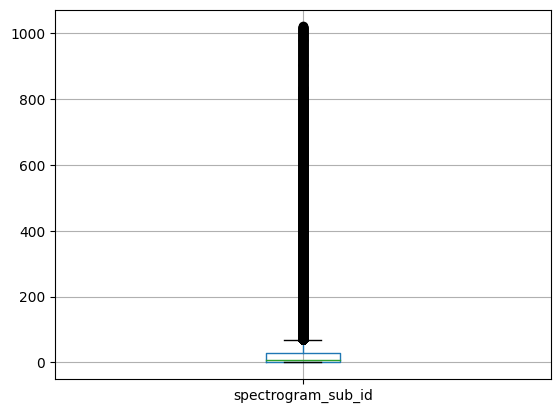

Feature: spectrogram_label_offset_seconds
Type: float64
Values: [   0.    6.    8. ... 1135. 1201. 1207.]
Missing Values: 0


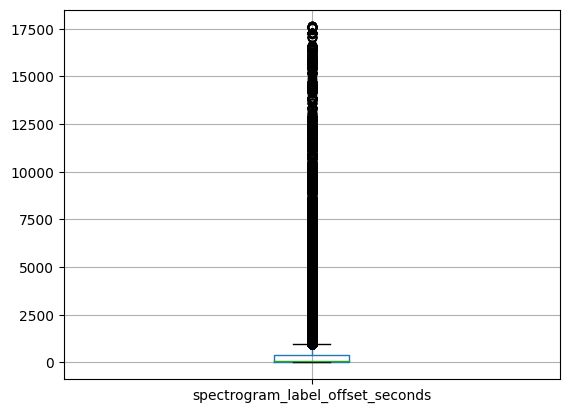

Feature: label_id
Type: int64
Values: [ 127492639 3887563113 1142670488 ...  461435451 3786213131 3642716176]
Missing Values: 0


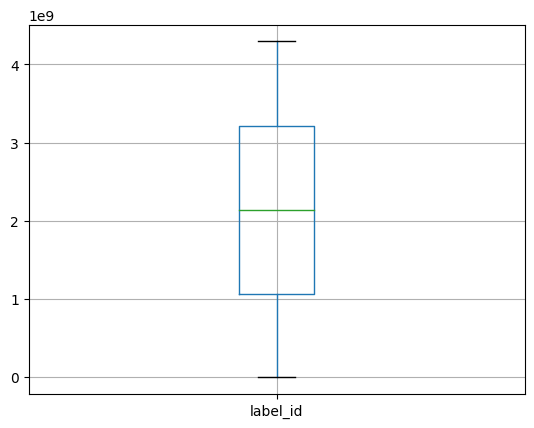

Feature: patient_id
Type: int64
Values: [42516 30539 56885 ...   200  5149  7118]
Missing Values: 0


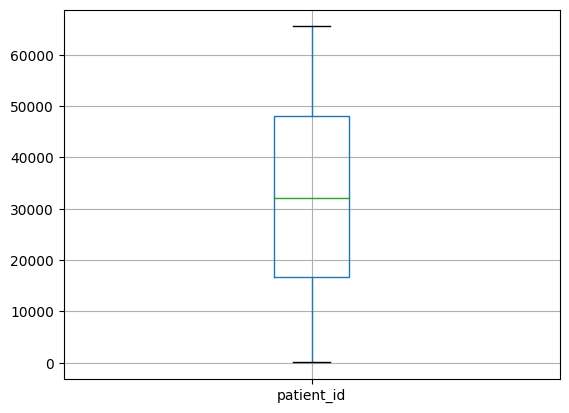

Feature: expert_consensus
Type: int64
Values: [5 0 3 4 1 2]
Missing Values: 0


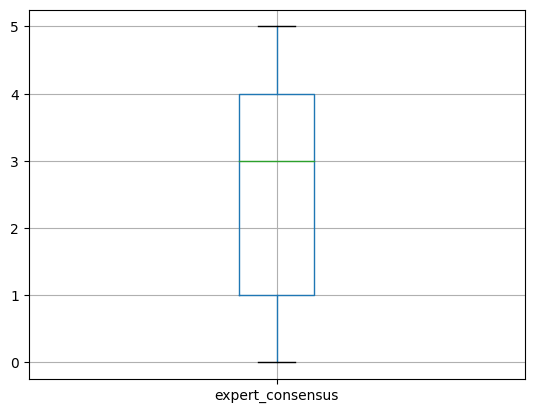

Feature: seizure_vote
Type: int64
Values: [ 3  0  1  4  5  6 13  2 12 14  7 10 15  9  8 11 16 19]
Missing Values: 0


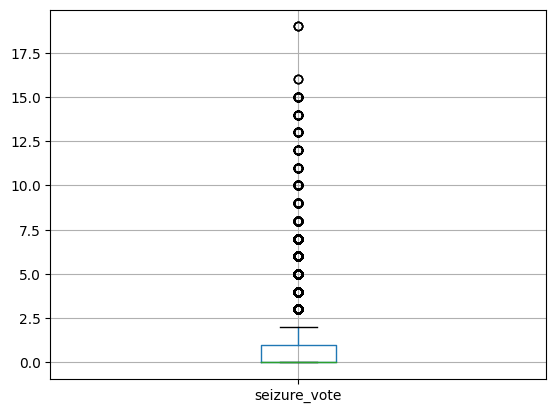

Feature: lpd_vote
Type: int64
Values: [ 0  1  2  4  7  3  9 13 11  5  6  8 12 15 10 18 14 16 17]
Missing Values: 0


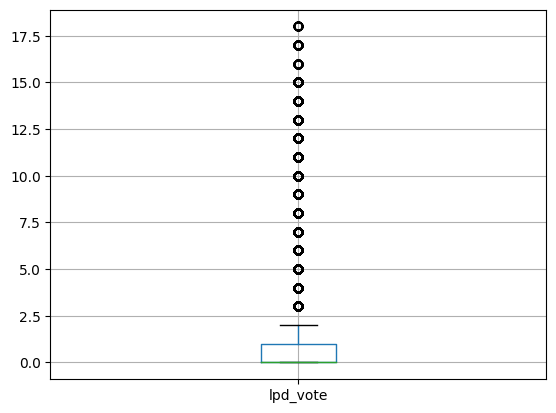

Feature: gpd_vote
Type: int64
Values: [ 0  5  2  1  3  7 12 13 11  6  4  8  9 14 10 15 16]
Missing Values: 0


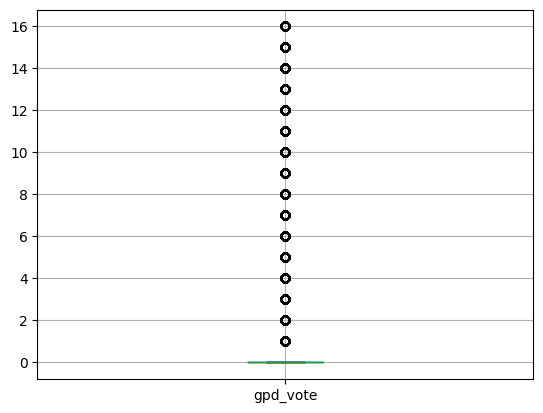

Feature: lrda_vote
Type: int64
Values: [ 0 14  3  2  1  9  5  8 11  4  6  7 12 10 13 15]
Missing Values: 0


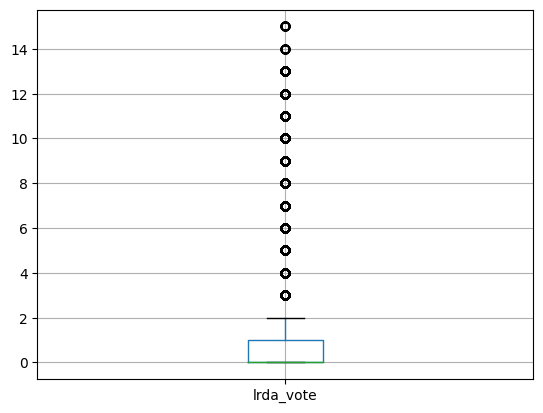

Feature: grda_vote
Type: int64
Values: [ 0  1  9  3  8  4  7  2  5  6 13 10 11 12 15 14]
Missing Values: 0


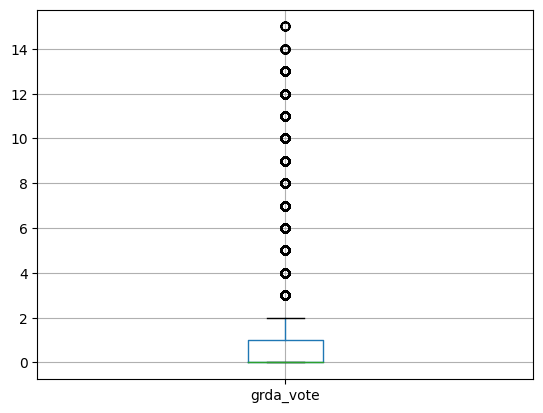

Feature: other_vote
Type: int64
Values: [ 0  5  1  9  2  3  4 17 10 12  8  7 11  6 16 15 18 14 13 20 19 25 24 21
 22 23]
Missing Values: 0


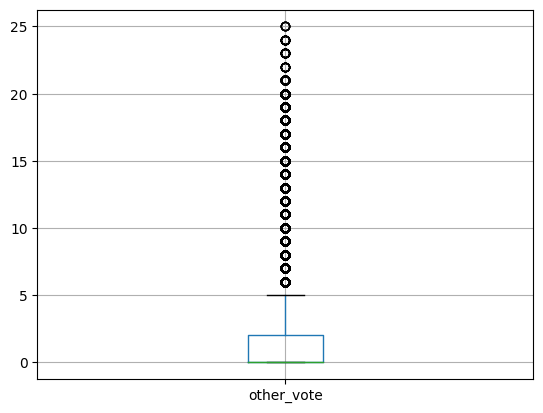

In [22]:
for feature in features_seen:
    print("Feature:", feature)
    print("Type:", train_data_2[feature].dtype)
    print("Values:", train_data_2[feature].unique())
    print("Missing Values:", train_data_2[feature].isna().sum())
    if train_data_2[feature].dtype == 'float64' or train_data_2[feature].dtype == 'int64':
        train_data_2.boxplot(column=feature)
        plt.show()
        detect_outliers(train_data_2)